# Guided Project: Star Wars Survey

### Introduction

The objective of this project is to familiarize myself with the task of cleaning and exploring data by applying what I have learned in previous lessons (Regrex, Data Aggregation, Working with Missing Data, etc.). 

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

### Read in the dataset

First, we need to read in the dataset, with the `encoding` being specified as `"ISO-8859-1"`

In [1]:
import numpy as np
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
pd.set_option('max_columns', 50)
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,

In [3]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Changing and Mapping Yes/No Columns

These two columns:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

...are YES/NO columns in which main values are `Yes` and `No`. We can make the data a bit easier to work with by switching `Yes` to `True` and `No` to `False`, leaving `NaN` value as it is, so we do not need to bother about string comparison. 

In [4]:
# Using Series.map() method to perform conversion
yes_no = {
    "Yes": True,
    "No": False }

bool_cols = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]
for col in bool_cols:
    star_wars[col] = star_wars[col].map(yes_no)

In [5]:
# Check for columns'values
for col in bool_cols:
    print(star_wars[col].value_counts(dropna = False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


### Cleaning and Mapping Checkbox Columns

The next six columns represent a single check question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.` 

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [6]:
# Convert each column so that it only contains the values `True` and `False`
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

#### Changing Values

In [7]:
checkbox_dict = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(checkbox_dict)

In [8]:
# Confirm if values are converted correctly
star_wars.iloc[:,3:9].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,False,True,False,False,False,False


#### Renaming Column

In [9]:
dict = {col: "seen_{}".format(i) for col, i in zip(star_wars.columns[3:9], range(1,7))}

In [10]:
star_wars.rename(columns = dict, inplace = True)

In [11]:
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


### Cleaning and Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

We need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

#### Converting ranking columns to numeric types

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#### Renaming ranking columns

In [13]:
dict_ranking = {col: "ranking_{}".format(i) for col, i in zip(star_wars.columns[9:15], range(1,7))}

In [14]:
star_wars.rename(columns = dict_ranking, inplace = True)

In [15]:
print(star_wars.columns[9:15])

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


### Finding the Highest-Ranked Movie

Now we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns.

In [16]:
star_wars.iloc[:,9:15].mean().sort_values(ascending = False)

ranking_3    4.341317
ranking_2    4.087321
ranking_1    3.732934
ranking_4    3.272727
ranking_6    3.047847
ranking_5    2.513158
dtype: float64

#### Make a bar chart to display the result

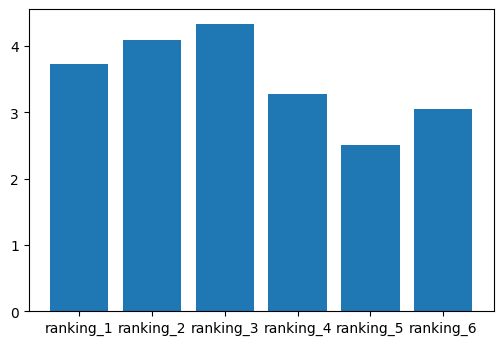

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean())
plt.show()

### Fiding the Most Viewed Movie

Earlier, we cleaned up the `seen` columns and converted their values to the Boolean type. Now let's see which movie got the most views.

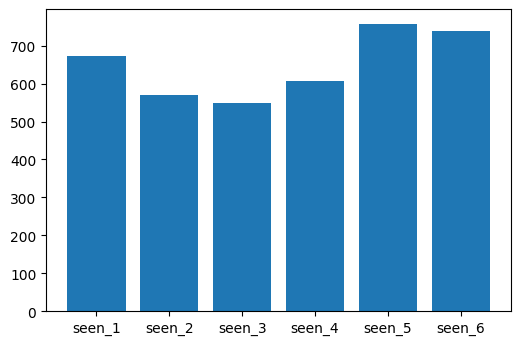

In [18]:
plt.bar(star_wars.columns[3:9], star_wars.iloc[:,3:9].sum())
plt.show()

Most people watched the `seen_5` movie - `Star Wars: Episode V The Empire Strikes Back`. Coming back to the original question - **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**, simply assigning most-view movie to being **clearly the best of the bunch** is a bit irrelevant. But it is interesting to see how many people watch Star Wars series.

### Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:
- Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
- Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
- Gender — Male or Female

In [19]:
star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_star_wars_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

#### Finding high-ranked movie among two groups

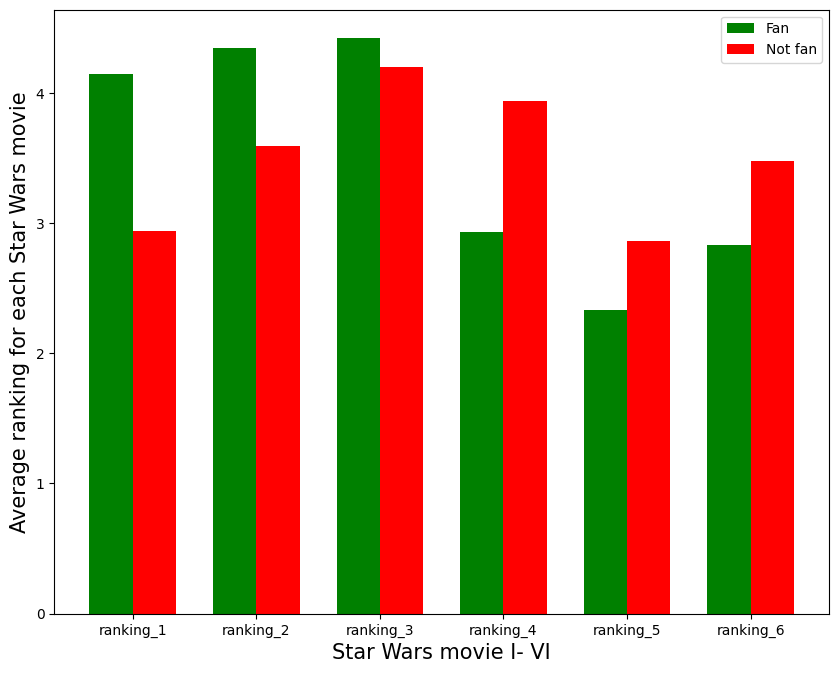

In [20]:
N = len(star_wars_fan.columns[9:15])

ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize =(10, 8))


fan = ax.bar(ind, star_wars_fan.iloc[:,9:15].mean(), width, color = "g", label = "Fan")
not_fan = ax.bar(ind + width, not_star_wars_fan.iloc[:,9:15].mean(), width, color = "r", label = "Not fan")


ax.set_xlabel("Star Wars movie I- VI", fontsize = 15)
ax.set_ylabel("Average ranking for each Star Wars movie", fontsize = 15)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((star_wars_fan.columns[9:15]))

plt.legend()
plt.show()

In [21]:
# Compared the mean of first three and last thress movies among Star Wars Fan
first_three = (star_wars_fan.iloc[:,9:12].mean()).mean()
last_three = (star_wars_fan.iloc[:,12:15].mean()).mean()

In [22]:
print( "Among Star Wars Fan","\n",
"Mean of first three Star Wars movie ranking rate: ", round(first_three,3), "\n"
"Mean of last three Star Wars movie ranking rate: ",round(last_three,3))

Among Star Wars Fan 
 Mean of first three Star Wars movie ranking rate:  4.3 
Mean of last three Star Wars movie ranking rate:  2.699


For the first three movies, we can notice people who identified as `Star Wars Fan`, ranked them higher than people who identified as `Not Star Wars Fan`. 

For the last three Star Wars movies (IV, V, VI), overall people ranked them a lot lower compared to the first three (especially `Star Wars Fan`), however, `Not Star Wars Fan` ranked them a lot higher compared to `Star Wars Fan`.

#### Finding most-viewed movie among two groups

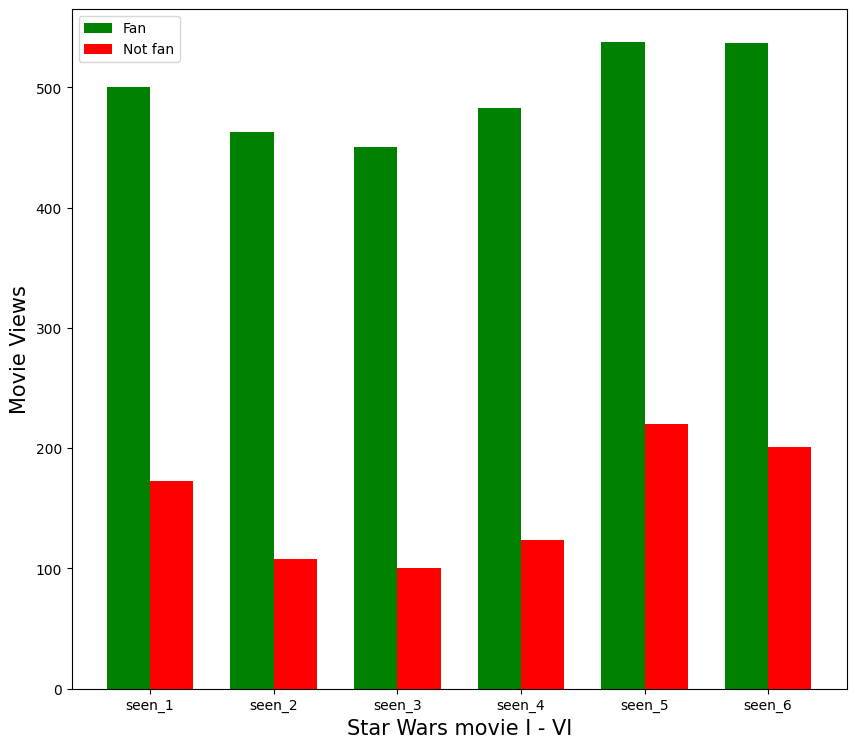

In [23]:
N = len(star_wars_fan.columns[9:15])

ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize =(10, 9))


fan = ax.bar(ind, star_wars_fan.iloc[:,3:9].sum(), width, color = "g", label = "Fan")
not_fan = ax.bar(ind + width, not_star_wars_fan.iloc[:,3:9].sum(), width, color = "r", label = "Not fan")


ax.set_xlabel("Star Wars movie I - VI", fontsize = 15)
ax.set_ylabel("Movie Views", fontsize = 15)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels((star_wars_fan.columns[3:9]))

plt.legend()
plt.show()

The chart above meets our expectation on `Star Wars Fan` to each movie, that the views on each movie is subtantially higher among the fans, compared to views among `Not Star Wars Fan`. 

Out of all movies, the `V` one - `Star Wars: Episode V The Empire Strikes Back` receives the most views from both fans and non-fans.

### Conclusions

Our main objective is to determine if **the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?** 

According to our data, we performed cleaning, renaming, and changing columns' values' type in order to do the analysis. The result is that `Star Wars: Episode III Revenge of the Sith` is the best Star Wars movie in terms of highest ranking score both from `Star Wars Fan` and `Not Star Wars Fan`; however, the most-viewed movie is `Star Wars: Episode V The Empire Strikes Back`.  As per ranking score, `Star Wars: Episode V The Empire Strikes Back` receives the lowest score comparing to other in the franchise. The best, I, personally, do not think so.

Nonetheless, I have not watched any of the Star Wars movie, so I believe my take on this topic is irrelevant. But it is cool to see how people think about Star Wars.